# 4. EDA and Visualization

Now that we have the cleaned data, we can learn more about it and get more insight via visualization.\
To do this, we will first import the required directories:

In [1]:
import pandas as pd
from plotchecker import LinePlotChecker, ScatterPlotChecker, BarPlotChecker
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from collections import Counter
import warnings
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import datetime
import re
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline

(For convenience - the database has been translated into English using Google Translate)
Load the clean dataset:

In [2]:
df = pd.read_csv('data/data_after_cleaning.csv')

Lets learn a little bit about our dataset.

In [3]:
df.describe()

,numberOfSpecializations,daysToAppointment,onlineAppointmentScheduling,onlineAppointmentCanceling,needsReferral,preformUS,absence,acceptingNewPatients,videoCall,visitCost,...,romanian,russian,spanish,swedish,turkish,ukrainian,yiddish,yugoslav,numOfLangs,totalPerWeek
count,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000,...,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000
mean,1.062398,32.970840,0.940049,0.958809,0.217985,0.056688,0.039356,0.956158,0.003059,16.425367,...,0.035889,0.250204,0.036501,0.000204,0.000816,0.002447,0.015090,0.000204,2.444331,10.152607
std,0.263686,44.127143,0.237420,0.198752,0.412919,0.231270,0.194459,0.204764,0.055227,14.933647,...,0.186033,0.433175,0.187552,0.014280,0.028551,0.049411,0.121922,0.014280,0.928485,7.759884
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000
50%,1.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,7.500000
75%,1.000000,45.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,30.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,15.000000
max,4.000000,198.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,35.000000


Lets write a function that give us the top 5 values that gonna help us later:

In [4]:
def getTopNum(df, col_name, num, normalize=False):
   return df[col_name].value_counts(normalize = normalize).nlargest(n=num) 

Now, let's get some statistics:

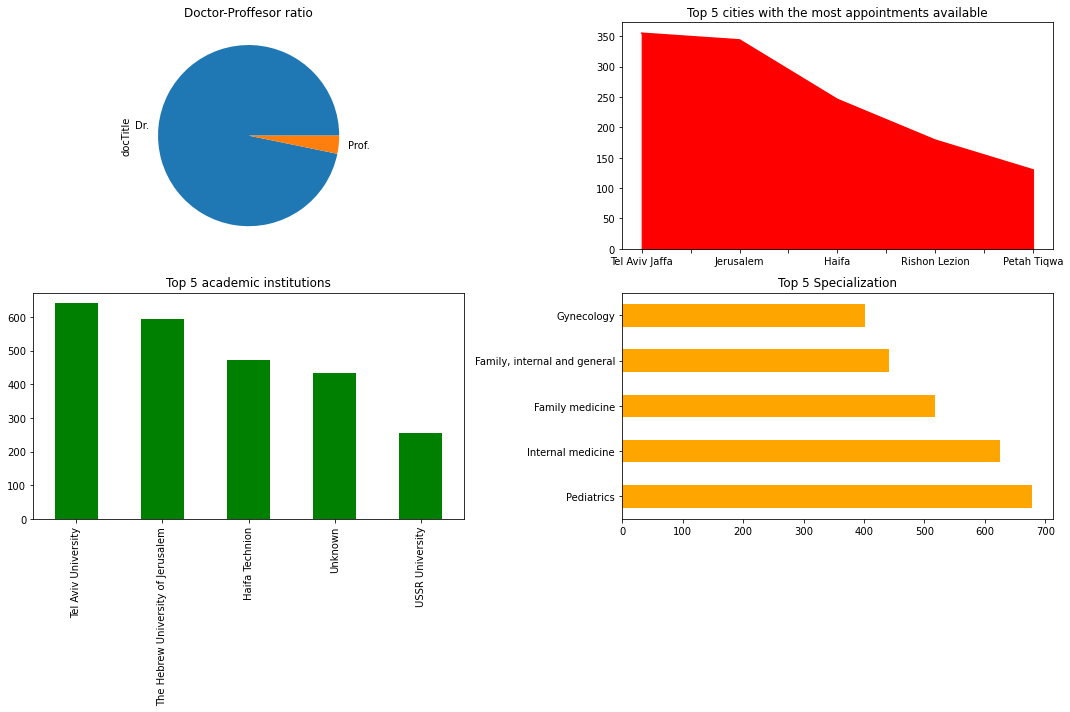

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
getTopNum(df, "docTitle", 5, True).plot(kind="pie",ax=axes[0,0]); axes[0,0].set_title("Doctor-Proffesor ratio")
getTopNum(df, "clinicCity", 5).plot(kind="area", ax=axes[0,1], color="r"); axes[0,1].set_title("Top 5 cities with the most appointments available")
getTopNum(df, "academicInstitution", 5).plot(kind="bar", ax=axes[1,0], color="g"); axes[1,0].set_title("Top 5 academic institutions")
getTopNum(df, "specialization", 5).plot(kind="barh", ax=axes[1,1], color="orange"); axes[1,1].set_title("Top 5 Specialization")
fig.tight_layout()

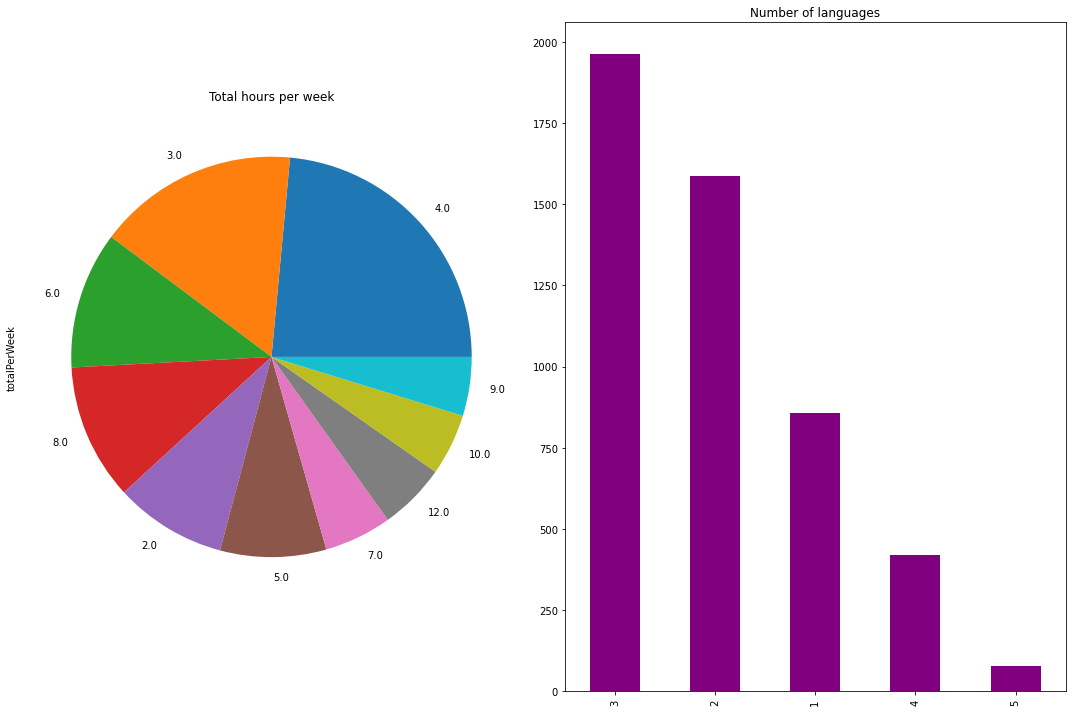

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

getTopNum(df, "totalPerWeek", 10).plot(kind="pie", ax=axes[0]); axes[0].set_title("Total hours per week")
getTopNum(df, "numOfLangs", 5).plot(kind="bar", ax=axes[1], color="purple"); axes[1].set_title("Number of languages")
fig.tight_layout()

Since most of our data is categorical,  
we can't inferr to much from the heatmap but any additoinal information can help :)

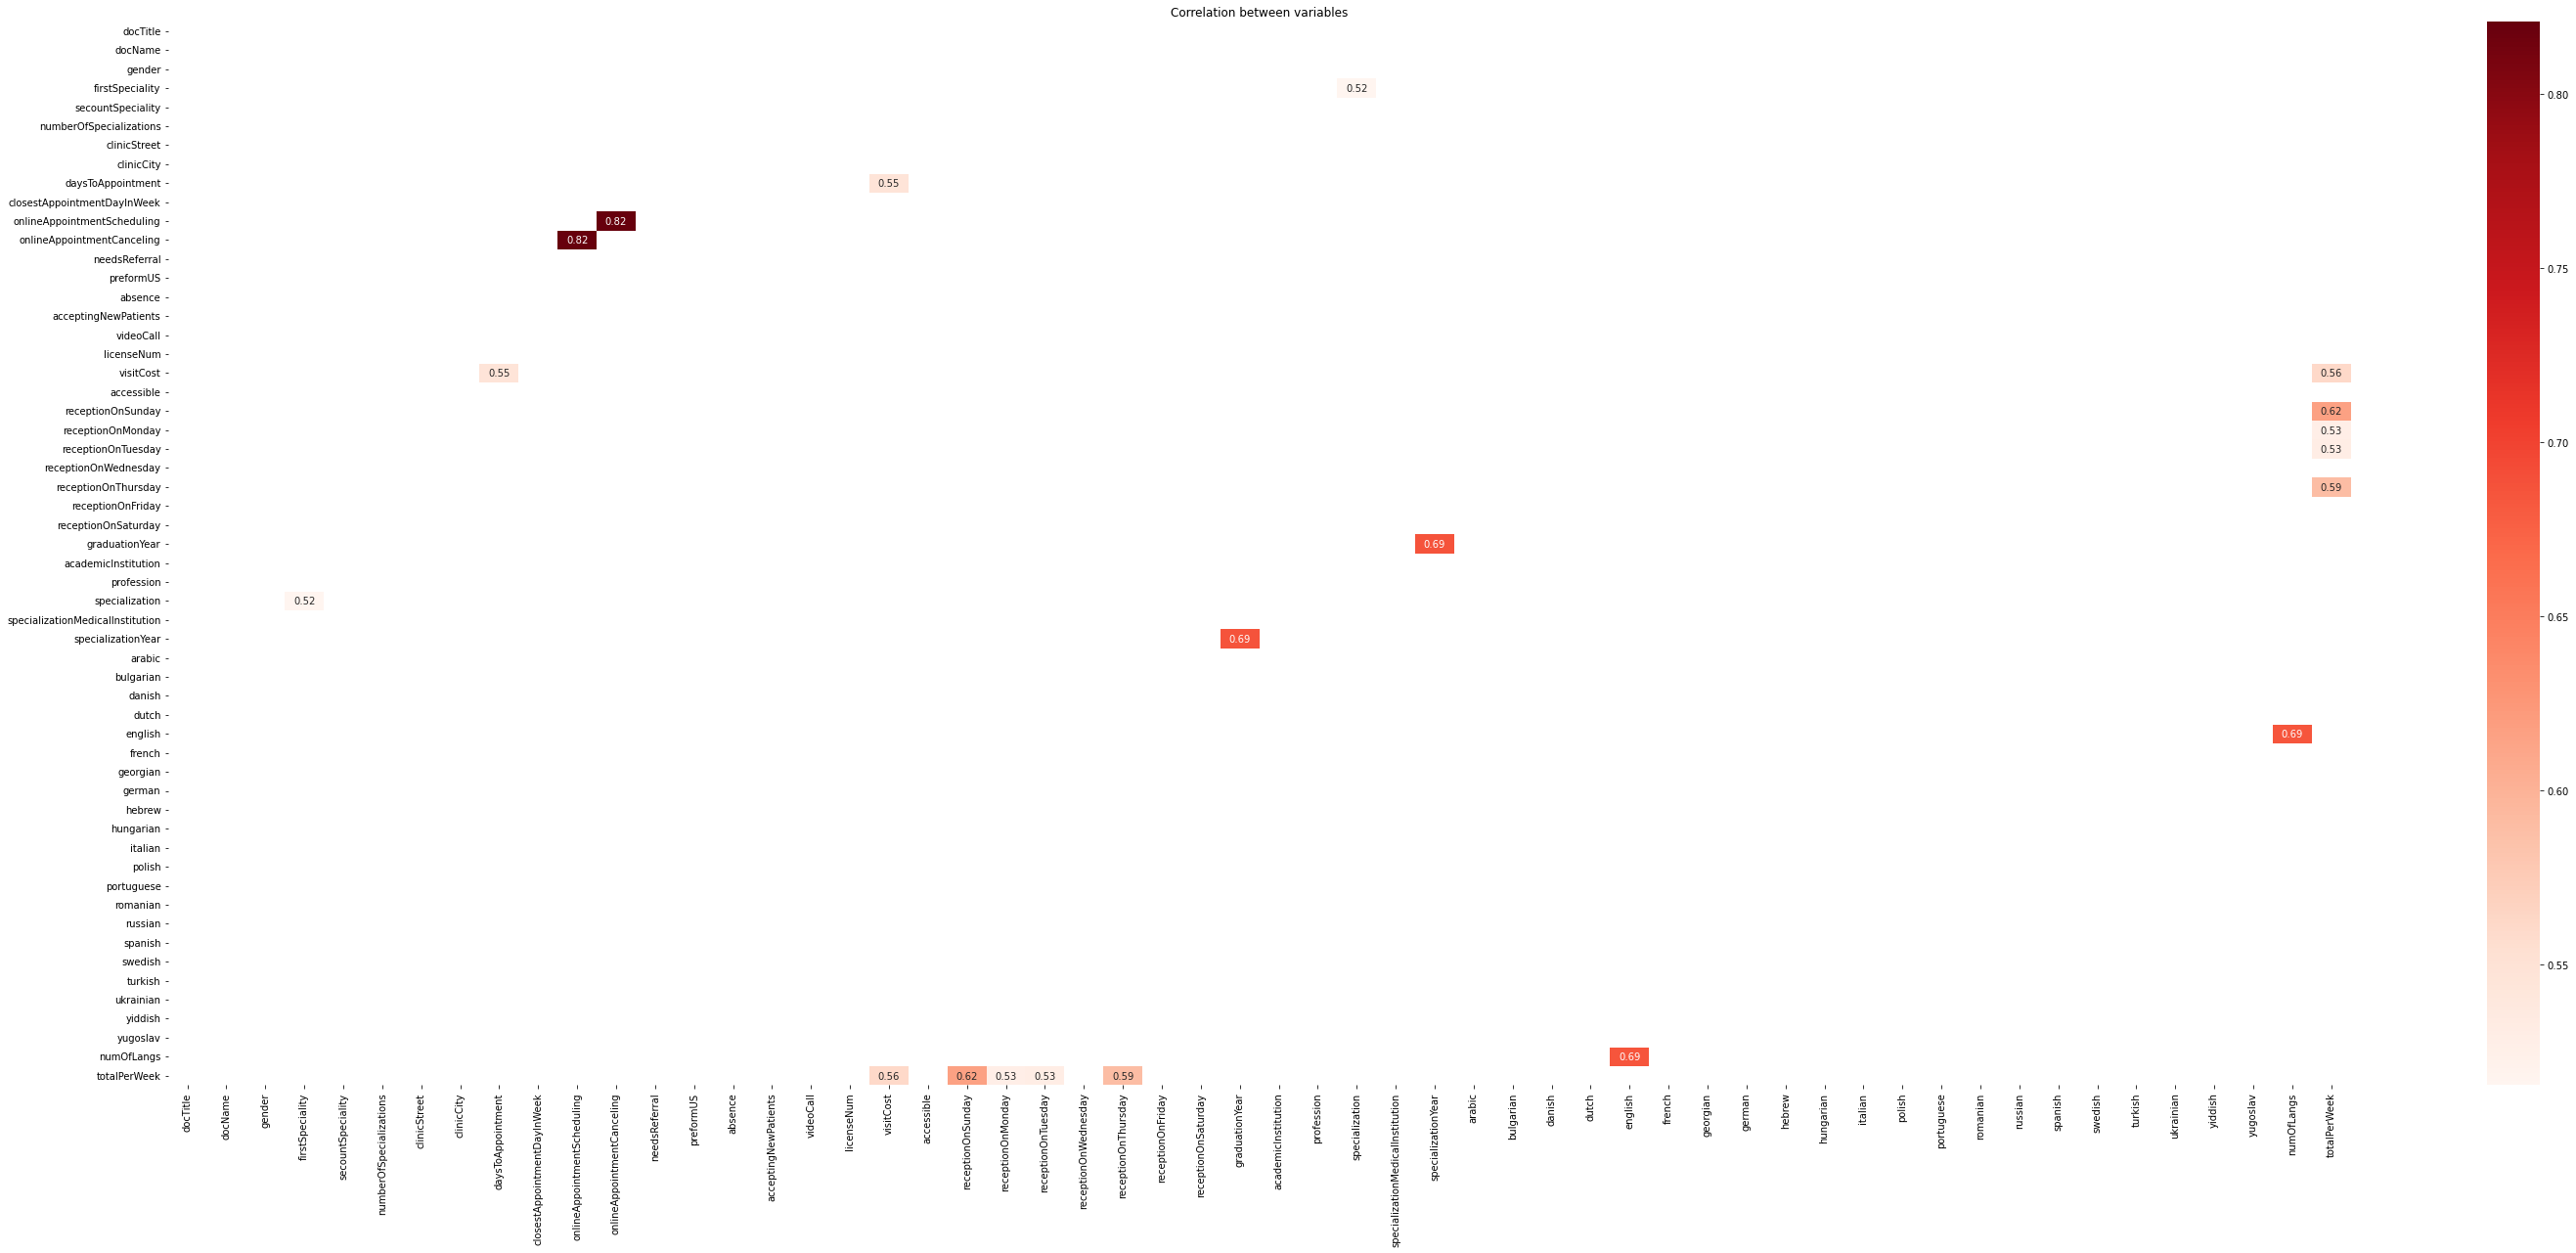

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
objList = df.select_dtypes(include = "object").columns
for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))
dfCorr = df.corr(method="spearman").abs()
filteredDf = dfCorr[(dfCorr >= .5) & (dfCorr !=1.000)]
plt.figure(figsize=(50,20))
plt.title("Correlation between variables")
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

Ok, we can see that daysToApointments correlated with visitCost,
which means there is a connection between the treatment type (professional/first) to the wait for appointments 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4904 entries, 0 to 4903
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   docTitle                          4904 non-null   int32  
 1   docName                           4904 non-null   int32  
 2   gender                            4904 non-null   int32  
 3   firstSpeciality                   4904 non-null   int32  
 4   secountSpeciality                 4904 non-null   int32  
 5   numberOfSpecializations           4904 non-null   int64  
 6   clinicStreet                      4904 non-null   int32  
 7   clinicCity                        4904 non-null   int32  
 8   daysToAppointment                 4904 non-null   int64  
 9   closestAppointmentDayInWeek       4904 non-null   int32  
 10  onlineAppointmentScheduling       4904 non-null   int64  
 11  onlineAppointmentCanceling        4904 non-null   int64  
 12  needsR

Lets save the encoded df!

In [9]:
df.to_csv("data/data_after_encoding.csv", index=False)
print("Dataframe saved as CSV file.")

Dataframe saved as CSV file.
